<a href="https://kritikseth.github.io/ipynbtagredirect" target="_parent"><img src="https://raw.githack.com/kritikseth/kritikseth/master/assets/icons/kritik_ipynbtagredirect.svg" alt="Kritik Seth"/></a>

If you are viewing this in GitHub and cannot see the plots, [Click Here](https://nbviewer.jupyter.org/github/kritikseth/ML-College-Sem-V/blob/master/ML_07_J043_240820.ipynb)

[Click Here](https://github.com/kritikseth/ML-College-Sem-V/blob/master/ML_07_J043_240820.ipynb) to go back to GitHub

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
le = LabelEncoder()
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
imp_mean = IterativeImputer(random_state=0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import tensorflow as tf
from keras import models
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Activation, LeakyReLU

In [3]:
import plotly.graph_objects as go

#Titanic


In [4]:
train = 'https://raw.githubusercontent.com/pranavn91/blockchain/master/train.csv'
train = pd.read_csv(train)

### Cleaning and EDA

In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
[train[i].unique() for i in train.iloc[:,[1,2,4,6,7,11]].columns]

[array([0, 1]),
 array([3, 1, 2]),
 array(['male', 'female'], dtype=object),
 array([1, 0, 3, 4, 2, 5, 8]),
 array([0, 1, 2, 5, 3, 4, 6]),
 array(['S', 'C', 'Q', nan], dtype=object)]

First we will drop PassengerId as it consists only of unique values

In [10]:
train.drop(['PassengerId'], axis=1, inplace=True)

Label encoding 'Sex' 

In [11]:
train['Sex'] = le.fit_transform(train['Sex'])

In [12]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We will fill the 2 missing values in 'Embarked' with its mode

In [13]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

We can notice that the first letter in Cabin stands for Deck so we will create a new column 'Deck'.
Here we'll put 'M'wherever Cabin is not given indicating 'Missing''


In [14]:
train['Deck'] = train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

Create a column 'FSize' = 'SibSp' + 'Parch' + 1

In [15]:
train['FSize'] = train['Parch'] + train['SibSp'] + 1

Create a column 'IsAlone' which indicated if the passenger was travelling alone or not

In [16]:
train['IsAlone'] = 1
train['IsAlone'].loc[train['FSize'] > 1] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FSize,IsAlone
0,0,3,1,22.0,1,0,7.2500,S,M,2,0
1,1,1,0,38.0,1,0,71.2833,C,C,2,0
2,1,3,0,26.0,0,0,7.9250,S,M,1,1
3,1,1,0,35.0,1,0,53.1000,S,C,2,0
4,0,3,1,35.0,0,0,8.0500,S,M,1,1


We will Label Encode 'Deck' and 'Embarked''


In [19]:
train['Deck'] = le.fit_transform(train['Deck'])
train['Embarked'] = le.fit_transform(train['Embarked'])

In [20]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Deck          0
FSize         0
IsAlone       0
dtype: int64

Imputing missing values using Simple Imputer

In [21]:
columns = train.columns

In [22]:
train = imp_mean.fit_transform(train)

In [23]:
train = pd.DataFrame(train, columns=columns)

In [24]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FSize,IsAlone
0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500,2.0,7.0,2.0,0.0
1,1.0,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0,2.0,2.0,0.0
2,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250,2.0,7.0,1.0,1.0
3,1.0,1.0,0.0,35.000000,1.0,0.0,53.1000,2.0,2.0,2.0,0.0
4,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500,2.0,7.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.000000,0.0,0.0,13.0000,2.0,7.0,1.0,1.0
887,1.0,1.0,0.0,19.000000,0.0,0.0,30.0000,2.0,1.0,1.0,1.0
888,0.0,3.0,0.0,23.147203,1.0,2.0,23.4500,2.0,7.0,4.0,0.0
889,1.0,1.0,1.0,26.000000,0.0,0.0,30.0000,0.0,2.0,1.0,1.0


One Hot Encoding 'PClass'

In [25]:
pclass_ohe = pd.get_dummies(train['Pclass'], prefix_sep='Pclass_')
train.drop(['Pclass'], axis=1)
train = train.join(pclass_ohe)

In [26]:
train.dtypes

Survived    float64
Pclass      float64
Sex         float64
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked    float64
Deck        float64
FSize       float64
IsAlone     float64
1.0           uint8
2.0           uint8
3.0           uint8
dtype: object

In [27]:
X = train.drop(['Survived'], axis=1)
Y = train['Survived']

Scaling the data

In [28]:
X = scaler.fit_transform(X)

### Correlation Matrix Heatmap

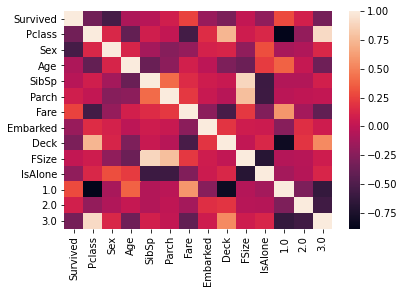

In [29]:
sns.heatmap(train.corr())

### Train, Test, Validation

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

### Cross Validation

In [31]:
xgb = XGBClassifier()
logr = LogisticRegression()
models = [xgb, logr]

In [32]:
accuracy = []
def validate(models):
  for i in models:
    i.fit(X_train, y_train)
    pred = i.predict(X_test, y_test)
    accuracy.append(accuracy_score(y_val, pred))
  return accuracy

### Grid Search

In [33]:
xgb = XGBClassifier(n_estimators=600, objective='binary:logistic',silent=True, nthread=1, colsample_bytree= 0.6,
 gamma= 2,
 max_depth= 4,
 min_child_weight= 1,
 subsample= 1.0)

In [34]:
xgb = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=123
)

In [35]:
parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05, 0.5]
}

In [36]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [37]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   29.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  3.5min
[Parallel(n_jobs=10)]: Done 1280 out of 1280 | elapsed:  3.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=123, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.5],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
  

In [38]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [39]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [40]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [41]:
pred = xgb.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8491620111731844

### Neural Network

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [44]:
model = Sequential()
model.add(Dense(units = 1024, activation = 'relu', input_shape = (13,)))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 5120, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              14336     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 5120)              2626560   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 5120)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5121      
Total params: 3,170,817
Trainable params: 3,170,817
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 1000, validation_split = 0.20)

In [ ]:
(loss, accuracy) = model.evaluate(X_test, y_test)

# Forest Cover

In [49]:
from sklearn.datasets import fetch_covtype
forest = fetch_covtype()

In [50]:
Xforest = pd.DataFrame(forest.data)
Yforest = pd.DataFrame(forest.target)

### Cleaning and EDA

In [51]:
Xforest.shape 

(581012, 54)

In [52]:
Xforest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
Xforest.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397

Log Transformation on 1

In [54]:
Xforest[1] = np.log(Xforest[1]+1)

Standard Scaling the dataset

In [55]:
Xforest = scaler.fit_transform(Xforest)

Label Encoding the Target

In [56]:
Yforest = le.fit_transform(Yforest)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



To Categorical

In [57]:
Yforest_ohe = to_categorical(Yforest)

In [58]:
Yforest_ohe.shape

(581012, 7)

### Train Validation Test Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(Xforest, Yforest_ohe, test_size = 0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

### Neural Network

In [60]:
model = Sequential()

model.add(Dense(units=500, activation='relu', input_dim=54))
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=300))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9 and logs.get('loss')<0.1):
            print("\nStopping")
            self.model.stop_training = True

callbacks = myCallback()

In [61]:
history = model.fit(X_train, y_train,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[callbacks],
                    batch_size = 10000)

35/35 [==============================] - 0s 14ms/step - loss: 0.1037 - accuracy: 0.9579 - val_loss: 0.1318 - val_accuracy: 0.9499
Epoch 97/200
35/35 [==============================] - 0s 13ms/step - loss: 0.1016 - accuracy: 0.9589 - val_loss: 0.1847 - val_accuracy: 0.9324
Epoch 98/200
35/35 [==============================] - 0s 14ms/step - loss: 0.1014 - accuracy: 0.9588 - val_loss: 0.1414 - val_accuracy: 0.9472
Epoch 99/200
35/35 [==============================] - 0s 13ms/step - loss: 0.1013 - accuracy: 0.9594 - val_loss: 0.1604 - val_accuracy: 0.9387
Epoch 100/200
31/35 [=========================>....] - ETA: 0s - loss: 0.0989 - accuracy: 0.9598
Stopping
35/35 [==============================] - 0s 14ms/step - loss: 0.0982 - accuracy: 0.9601 - val_loss: 0.1373 - val_accuracy: 0.9486


In [62]:
model.evaluate(X_test, y_test)

3632/3632 [==============================] - 8s 2ms/step - loss: 0.1347 - accuracy: 0.9484


[0.13471579551696777, 0.9483748078346252]

In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['accuracy'],
                         mode='lines',
                         name='Train'))
fig.add_trace(go.Scatter(y=history.history['val_accuracy'],
                         mode='lines',
                         name='Validation'))
fig.update_layout(title_text='Forest Cover Data: Accuracy vs Epochs')
fig.show()

In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'],
                         mode='lines',
                         name='Train'))
fig.add_trace(go.Scatter(y=history.history['val_loss'],
                         mode='lines',
                         name='Validation'))
fig.update_layout(title_text='Forest Cover Data: Loss vs Epochs')
fig.show()

# Fetch CupKdd99

In [65]:
from sklearn.datasets import fetch_kddcup99
fetch = fetch_kddcup99()

In [66]:
Xfetch = pd.DataFrame(fetch.data)
Yfetch = pd.DataFrame(fetch.target)

### Cleaning and EDA

In [67]:
Xfetch.shape

(494021, 41)

In [68]:
Xfetch.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,0,1,0,0,9,9,1,0,0.11,0,0,0,0,0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,0,1,0,0,19,19,1,0,0.05,0,0,0,0,0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,0,1,0,0,29,29,1,0,0.03,0,0,0,0,0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0,0,0,0,1,0,0,39,39,1,0,0.03,0,0,0,0,0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0,0,0,0,1,0,0,49,49,1,0,0.02,0,0,0,0,0


In [69]:
for i in [1,2,3]:
  Xfetch[i] = [j.decode('utf-8') for j in Xfetch[i]]
  Xfetch[i] = le.fit_transform(Xfetch[i])

for i in range(Xfetch.shape[1]):
  Xfetch[i] = Xfetch[i].astype('float')

In [70]:
Xfetch.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
count,494021.000000,494021.000000,494021.000000,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.0,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,0.467132,23.408894,7.842446,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.285690,292.906557,0.176687,0.176609,0.057433,0.057719,0.791547,0.020982,0.028997,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,0.575606,13.538332,2.250853,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,0.010551,0.007793,2.012718,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147412,246.322817,0.380717,0.381017,0.231623,0.232147,0.388189,0.082205,0.142397,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.000000,9.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,14.000000,9.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,42.000000,9.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,2.000000,65.000000,10.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Log Transformation on some columns

In [71]:
cols = [0, 1, 4, 5]
Xfetch[cols] = Xfetch[cols].applymap(lambda x: np.log(x+1)) 

Standard Scaling the dataset

In [72]:
Xfetch = scaler.fit_transform(Xfetch)

Label Encoding Target

In [73]:
Yfetch = [j.decode('utf-8') for j in Yfetch[0]]
Yfetch = le.fit_transform(Yfetch)
Yfetch = pd.DataFrame(Yfetch)

To Categorical

In [74]:
Yfetch_ohe = to_categorical(Yfetch)
Yfetch_ohe.shape

(494021, 23)

### Train Validation Test Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(Xfetch, Yfetch_ohe, test_size = 0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

### Neural Network

In [76]:
model = Sequential()

model.add(Dense(units=41, activation='relu', input_dim=41))
model.add(Dense(units=75))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(units=23, activation='softmax'))

model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9 and logs.get('loss')<0.1):
            print("\nStopping")
            self.model.stop_training = True

callbacks = myCallback()

In [77]:
history = model.fit(X_train, y_train,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[callbacks],
                    batch_size = 10000)

Epoch 1/200
30/30 [==============================] - 0s 10ms/step - loss: 1.4764 - accuracy: 0.8615 - val_loss: 0.4467 - val_accuracy: 0.9809
Epoch 2/200
30/30 [==============================] - 0s 6ms/step - loss: 0.2039 - accuracy: 0.9838 - val_loss: 0.0935 - val_accuracy: 0.9885
Epoch 3/200
30/30 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9898
Stopping
30/30 [==============================] - 0s 7ms/step - loss: 0.0588 - accuracy: 0.9898 - val_loss: 0.0399 - val_accuracy: 0.9904


In [78]:
model.evaluate(X_test, y_test)

3088/3088 [==============================] - 6s 2ms/step - loss: 0.0374 - accuracy: 0.9904


[0.037445493042469025, 0.9904458522796631]

In [79]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['accuracy'],
                         mode='lines',
                         name='Train'))
fig.add_trace(go.Scatter(y=history.history['val_accuracy'],
                         mode='lines',
                         name='Validation'))
fig.update_layout(title_text='Fetch CupKdd99 Data: Accuracy vs Epochs')
fig.show()

In [80]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'],
                         mode='lines',
                         name='Train'))
fig.add_trace(go.Scatter(y=history.history['val_loss'],
                         mode='lines',
                         name='Validation'))
fig.update_layout(title_text='Fetch CupKdd99 Data: Loss vs Epochs')
fig.show()

#Breast Cancer

In [81]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [82]:
Xbc = pd.DataFrame(bc.data)
Ybc = pd.DataFrame(bc.target)

### Cleaning and EDA

In [83]:
Xbc.shape

(569, 30)

In [84]:
Xbc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
Xbc.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Log Transformation on certain columns

In [86]:
cols = [6, 7, 10, 12, 13, 20, 21, 22, 28, 29]
Xbc[cols] = Xbc[cols].applymap(lambda x: np.log(x+1))

Standard Scaling the dataset

In [87]:
Xbc = pd.DataFrame(scaler.fit_transform(Xbc))

Label Encoding Target

In [88]:
Ybc = le.fit_transform(Ybc)
Ybc = pd.DataFrame(Ybc)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [89]:
Ybc.nunique()

0    2
dtype: int64

### Train Validation Test Split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(Xbc, Ybc, test_size = 0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

### Neural Network

In [91]:
model = Sequential()

model.add(Dense(units=30, activation='relu', input_dim=30))
model.add(Dense(units=60))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9 and logs.get('loss')<0.1):
            print("\nStopping")
            self.model.stop_training = True

callbacks = myCallback()

In [92]:
history = model.fit(X_train, y_train,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[callbacks])

Epoch 1/200
11/11 [==============================] - 0s 17ms/step - loss: 0.5140 - accuracy: 0.8358 - val_loss: 0.3762 - val_accuracy: 0.9474
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 0.3185 - accuracy: 0.9384 - val_loss: 0.2527 - val_accuracy: 0.9737
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 0.9501 - val_loss: 0.1772 - val_accuracy: 0.9912
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1737 - accuracy: 0.9501 - val_loss: 0.1324 - val_accuracy: 0.9912
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1409 - accuracy: 0.9560 - val_loss: 0.1008 - val_accuracy: 0.9912
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1195 - accuracy: 0.9619 - val_loss: 0.0817 - val_accuracy: 0.9912
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9619 - val_loss: 0.0688 - val_accuracy: 0.9912
Epoch 8/200


In [93]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9737


[0.11643102020025253, 0.9736841917037964]

In [94]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['accuracy'],
                         mode='lines',
                         name='Train'))
fig.add_trace(go.Scatter(y=history.history['val_accuracy'],
                         mode='lines',
                         name='Validation'))
fig.update_layout(title_text='Breast Cancer Data: Accuracy vs Epochs')
fig.show()

In [95]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'],
                         mode='lines',
                         name='Train'))
fig.add_trace(go.Scatter(y=history.history['val_loss'],
                         mode='lines',
                         name='Validation'))
fig.update_layout(title_text='Breast Cancer Data: Loss vs Epochs')
fig.show()

# Wine

In [96]:
from sklearn.datasets import load_wine
wine = load_wine()

In [97]:
Xwine = pd.DataFrame(wine.data)
Ywine = pd.DataFrame(wine.target)

### Cleaning and EDA

In [98]:
Xwine.shape, Ywine.shape

((178, 13), (178, 1))

In [99]:
Xwine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [100]:
Xwine.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Scaling the dataset

In [101]:
Xwine = scaler.fit_transform(Xwine)

Label Encoding Target

In [102]:
Ywine = le.fit_transform(Ywine)
Ywine = pd.DataFrame(Ywine)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



To Categorical

In [103]:
Ywine_ohe = to_categorical(Ywine)

In [104]:
Ywine_ohe.shape

(178, 3)

### Train Validation Test Split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(Xwine, Ywine_ohe, test_size = 0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

### Neural Network

In [106]:
model = Sequential()

model.add(Dense(units=26, activation='relu', input_dim=13))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9 and logs.get('loss')<0.1):
            print("\nStopping")
            self.model.stop_training = True

callbacks = myCallback()

In [107]:
history = model.fit(X_train, y_train,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[callbacks])

Epoch 1/200
4/4 [==============================] - 0s 31ms/step - loss: 1.1059 - accuracy: 0.5377 - val_loss: 1.1712 - val_accuracy: 0.3889
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 0.9947 - accuracy: 0.5472 - val_loss: 1.0939 - val_accuracy: 0.4722
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 0.9245 - accuracy: 0.5755 - val_loss: 1.0359 - val_accuracy: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.8665 - accuracy: 0.6132 - val_loss: 0.9895 - val_accuracy: 0.5000
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 0.8169 - accuracy: 0.6509 - val_loss: 0.9440 - val_accuracy: 0.5278
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.7723 - accuracy: 0.6981 - val_loss: 0.9018 - val_accuracy: 0.5556
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.7320 - accuracy: 0.7170 - val_loss: 0.8656 - val_accuracy: 0.6111
Epoch 8/200
4/4 [=========

In [108]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9722


[0.14351338148117065, 0.9722222089767456]

In [111]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['accuracy'],
                         mode='lines',
                         name='Train'))
fig.add_trace(go.Scatter(y=history.history['val_accuracy'],
                         mode='lines',
                         name='Validation'))
fig.update_layout(title_text='Wine Data: Accuracy vs Epochs')
fig.show()

In [112]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'],
                         mode='lines',
                         name='Train'))
fig.add_trace(go.Scatter(y=history.history['val_loss'],
                         mode='lines',
                         name='Validation'))
fig.update_layout(title_text='Wine Data: Loss vs Epochs')
fig.show()